## NLP with LSTM on Keras

- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [1]:
import numpy as np
import pylab as plt

# Keras module
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from keras.layersbjyers.embeddings import Embedding

from sklearn.model_selection import train_test_split
np.random.seed(7)

## Loading and preprocessing the data

- Load imdb data from keras.datasets
- Join the train and test (both equal) to make one big data
- Pad the data (Since different reviews have different length)
- split the data into train/test/val


In [2]:
TOP_WORDS = 5000
MAX_LEN   = 500
def load_data(top_words=5000, max_words = 500):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
    # pad the sequences
    X_train = sequence.pad_sequences(X_train, maxlen=max_words)
    X_test = sequence.pad_sequences(X_test, maxlen=max_words)
    X=np.concatenate((X_train, X_test), axis=0)
    y=np.concatenate((y_train, y_test), axis=0)
    
    
    X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.25)

    print (f"X_train.shape: {X_train.shape} y_train.shape:{y_train.shape}" )
    print (f"X_test.shape: {X_test.shape} y_test.shape:{y_test.shape}" )
    print (f"X_val.shape: {X_val.shape} y_val.shape:{y_val.shape}" )
        
    
    return (X_train, y_train, X_test, y_test, X_val, y_val)

(X_train, y_train, X_test, y_test, X_val, y_val) = load_data(top_words = TOP_WORDS, 
                                                             max_words = MAX_LEN)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do t

X_train.shape: (30000, 500) y_train.shape:(30000,)
X_test.shape: (10000, 500) y_test.shape:(10000,)
X_val.shape: (10000, 500) y_val.shape:(10000,)


In [4]:
print(y_train[11], X_train[11])

1 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    

## Model Building with LSTM

- First: Embedded layer that uses 32 length vectors to represent each word.
- Add LSTM with 100 neurons.
- Finally add a Dense layer with sigmoid activation as this is a binary classification problem ( Hence just a single neuron).


In [18]:
result = []

In [5]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(TOP_WORDS, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(16))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model1 = make_model(X_train, y_train)
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           80000     
_________________________________________________________________
lstm (LSTM)                  (None, 16)                2112      
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 82,129
Trainable params: 82,129
Non-trainable params: 0
_________________________________________________________________


In [6]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
235/235 [==============================] - 40s 171ms/step - loss: 0.5079 - accuracy: 0.7505 - val_loss: 0.3569 - val_accuracy: 0.8570
Epoch 2/5
235/235 [==============================] - 38s 162ms/step - loss: 0.3009 - accuracy: 0.8821 - val_loss: 0.3276 - val_accuracy: 0.8696
Epoch 3/5
235/235 [==============================] - 44s 186ms/step - loss: 0.2382 - accuracy: 0.9104 - val_loss: 0.2827 - val_accuracy: 0.8809
Epoch 4/5
235/235 [==============================] - 39s 164ms/step - loss: 0.2142 - accuracy: 0.9212 - val_loss: 0.2984 - val_accuracy: 0.8846
Epoch 5/5
235/235 [==============================] - 38s 162ms/step - loss: 0.1893 - accuracy: 0.9317 - val_loss: 0.3134 - val_accuracy: 0.8811


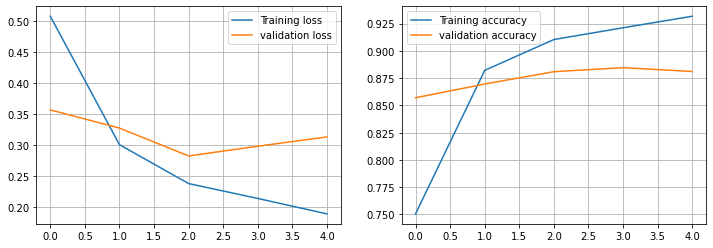

In [7]:
from helper import plot_history
plot_history(history1)

In [8]:
score = model1.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

313/313 [==============================] - 6s 18ms/step - loss: 0.3159 - accuracy: 0.8789
Accuracy: 87.89%


In [19]:
result.append(["DROPOUT: False, LSTM_LAYERS:1, LSTM_NODES:16, ADAM:default,\
                val_loss:.31, val_acc: 88%, test_acc: 87%"])

A nice around 88 % accuaracy on the test set. Which is close to the validation accuracy.

### Dropout

Keras provides this capability with parameters on the LSTM layer, the dropout for configuring the input dropout and recurrent_dropout for configuring the recurrent dropout.

In [9]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(TOP_WORDS, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = make_model(X_train, y_train)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 82,129
Trainable params: 82,129
Non-trainable params: 0
_________________________________________________________________


In [10]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
235/235 [==============================] - 95s 405ms/step - loss: 0.5160 - accuracy: 0.7491 - val_loss: 0.3676 - val_accuracy: 0.8443
Epoch 2/5
235/235 [==============================] - 92s 393ms/step - loss: 0.3097 - accuracy: 0.8756 - val_loss: 0.3167 - val_accuracy: 0.8774
Epoch 3/5
235/235 [==============================] - 94s 402ms/step - loss: 0.2518 - accuracy: 0.9023 - val_loss: 0.3113 - val_accuracy: 0.8816
Epoch 4/5
235/235 [==============================] - 94s 399ms/step - loss: 0.2279 - accuracy: 0.9149 - val_loss: 0.3522 - val_accuracy: 0.8781
Epoch 5/5
235/235 [==============================] - 91s 387ms/step - loss: 0.2099 - accuracy: 0.9201 - val_loss: 0.3003 - val_accuracy: 0.8812


313/313 [==============================] - 10s 31ms/step - loss: 0.2980 - accuracy: 0.8825
Accuracy: 88.25%


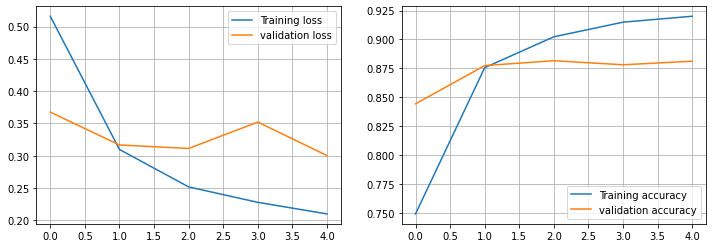

In [17]:
plot_history(history2)
score = model2.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

In [20]:
result.append(["DROPOUT: False, LSTM_LAYERS:1, LSTM_NODES:16, LSTM_DROPOUT:True,\
                ADAM:default, val_loss:.31, val_acc: 88%,test_acc: 88%"])

## LSTM and Convolutional Neural Network For Sequence Classification

We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM. We can use a smallish set of 32 features with a small filter length of 3. The pooling layer can use the standard length of 2 to halve the feature map size.

In [21]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(TOP_WORDS, embedding_length, input_length=X.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model3 = make_model(X_train, y_train)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 84,721
Trainable params: 84,721
Non-trainable params: 0
_________________________________________________________________


In [22]:
history3 = model3.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
235/235 [==============================] - 66s 281ms/step - loss: 0.4553 - accuracy: 0.7778 - val_loss: 0.3199 - val_accuracy: 0.8627
Epoch 2/5
235/235 [==============================] - 57s 241ms/step - loss: 0.2594 - accuracy: 0.8988 - val_loss: 0.3087 - val_accuracy: 0.8806
Epoch 3/5
235/235 [==============================] - 56s 239ms/step - loss: 0.2209 - accuracy: 0.9153 - val_loss: 0.2799 - val_accuracy: 0.8838
Epoch 4/5
235/235 [==============================] - 64s 272ms/step - loss: 0.1938 - accuracy: 0.9279 - val_loss: 0.2896 - val_accuracy: 0.8846
Epoch 5/5
235/235 [==============================] - 59s 251ms/step - loss: 0.1824 - accuracy: 0.9335 - val_loss: 0.3040 - val_accuracy: 0.8846


313/313 [==============================] - 7s 21ms/step - loss: 0.3021 - accuracy: 0.8867
Accuracy: 88.67%


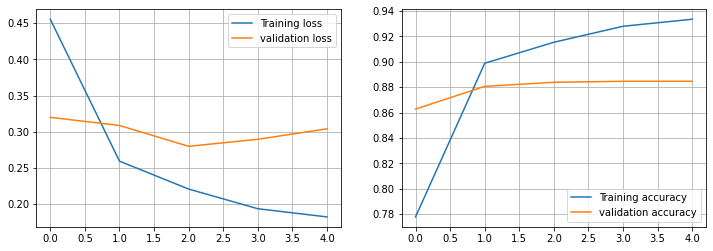

In [23]:
plot_history(history3)
score = model3.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

In [24]:
result.append(["DROPOUT: False, LSTM_LAYERS:1, LSTM_NODES:16, LSTM_DROPOUT:True,\
                CONV1D: True, MaxPooling: True,\
                ADAM:default, val_loss:.31, val_acc: 88%,test_acc: 88%"])

In [ ]:
def make_model(X, embedding_length = 32):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=X.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model4 = make_model(X_train, embedding_length = 16)
model4.summary()

In [ ]:
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

In [ ]:
plot_history(history4)
score = model4.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

In [ ]:
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=2,
                    batch_size=128,
                    verbose=1)

In [ ]:
plot_history(history4)
score = model4.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))